# 0. Description & Targets
Целевые действия:
'sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'


#### - Проведите проверку следующих гипотез:
1. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.
3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события


#### - Ответьте на вопросы продуктовой команды:
1. Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?
2. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?
3. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

# 1.Data preparation

In [1]:
!pip3 install pandas  
!pip3 install missingno 

In [2]:
import pandas as pd
import missingno as msno

In [3]:
# df_hits = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1aWTUBZoxDctNs-ldqEw-9dw0X2zR9upd')
df_hits = pd.read_csv('ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [38]:
df_hits_usable = df_hits[['session_id', 'event_action', 'hit_page_path']]
df_hits_usable.head()

,session_id,event_action,hit_page_path
0,5639623078712724064.1640254056.1640254056,quiz_show,sberauto.com/cars?utm_source_initial=google&ut...
1,7750352294969115059.1640271109.1640271109,quiz_show,sberauto.com/cars/fiat?city=1&city=18&rental_c...
2,885342191847998240.1640235807.1640235807,quiz_show,sberauto.com/cars/all/volkswagen/polo/e994838f...
3,142526202120934167.1640211014.1640211014,quiz_show,sberauto.com/cars?utm_source_initial=yandex&ut...
4,3450086108837475701.1640265078.1640265078,quiz_show,sberauto.com/cars/all/mercedes-benz/cla-klasse...


In [39]:
df_hits_usable['target'] = df_hits_usable.event_action.isin(['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'])


C:\Users\NA_PC\AppData\Local\Temp\ipykernel_13776\1655697762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hits_usable['target'] = df_hits_usable.event_action.isin(['sub_car_claim_click', 'sub_car_claim_submit_click',


In [40]:
df_hits_usable = pd.pivot_table(df_hits_usable,
               index=["session_id"],
               values=["target", "hit_page_path"],
               aggfunc={"target": sum, "hit_page_path": 'first'}
               ).reset_index()

In [41]:
# df_sessions = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1GaQnAgzshXMl0WwKHI11e2dBjMjoTlfU')
df_sessions = pd.read_csv('ga_sessions.csv')
df_sessions.head()

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_13776\3424410790.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [42]:
df_sessions.shape

(1860042, 18)

In [43]:
df_hits_usable.shape

(1734610, 3)

In [44]:
print(df_sessions.session_id.nunique())
print(df_hits_usable.session_id.nunique())

1860042
1734610


данные объединяет значения столбца session_id 
сделаем общую таблицу только в которую войдут только строки где session_id присутствует в обоих таблицах

In [45]:
df_united = pd.merge(df_hits_usable, df_sessions)
df_united.head()

,session_id,hit_page_path,target,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/faq?utm_source_initial=y...,0,232832813.163266,2021-09-26,16:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Samsung,NaN,412x869,Chrome,Russia,Gelendzhik
1,1000010177899156286.1635013443.1635013443,podpiska.sberauto.com/,0,232833013.163501,2021-10-23,21:24:03,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,NaN,360x640,Samsung Internet,Russia,Voronezh
2,1000013386240115915.1635402956.1635402956,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,0,232833760.16354,2021-10-28,09:35:56,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,NaN,412x846,Chrome,Russia,Cherkessk
3,1000017303238376207.1623489300.1623489300,podpiska.sberauto.com/,0,232834672.162349,2021-06-12,12:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Realme,NaN,360x780,Chrome,Russia,Irkutsk
4,1000020580299877109.1624943350.1624943350,sberauto.com/cars/https://sberauto.com/cars/b8...,0,232835435.162494,2021-06-29,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,414x736,Safari,Russia,Moscow


In [12]:
df_united.shape

(1732266, 20)

In [13]:
df_united.describe(include='all')

,session_id,hit_page_path,target,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1732266,1732266,1.732266e+06,1.732266e+06,1732266,1732266,1.732266e+06,1732190,1732266,1536979,1428129,711514,1732266,718302,1385070,15062,1732266,1732266,1732266,1732266
unique,1732266,186725,NaN,1.320702e+06,226,85032,NaN,280,55,406,280,1192,3,13,200,104,4947,55,159,2389
top,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/,NaN,1.750498e+09,2021-05-24,13:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,823002,NaN,4.490000e+02,39230,58044,NaN,552555,525206,422992,935408,465950,1368679,425520,503533,9018,155140,951573,1682423,750928
mean,NaN,NaN,5.936848e-02,NaN,NaN,NaN,2.627835e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.999437e-01,NaN,NaN,NaN,1.164260e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.EDA
Разведочный анализ данных (Exploratory Data Analysis)

## 2.1 Data cleaning

In [46]:
df_united_clean = df_united.copy()
df_united_clean.shape

(1732266, 20)

In [47]:
df_united_clean.duplicated().value_counts()

False    1732266
dtype: int64

#### Fullness of cells

In [48]:
def print_useful_rows_info(df):
    print('Amount of useful rows:', len(df.dropna()))
    print('Persentage of filled rows', round(len(df.dropna()) / len(df) * 100, 2))

In [49]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 13829
Persentage of filled rows 0.8


In [50]:
def blank_rows_percentage(df):
  print((df.isna().sum() / len(df) * 100).sort_values(ascending=False))

In [51]:
blank_rows_percentage(df_united_clean)

device_model                99.130503
utm_keyword                 58.925823
device_os                   58.533966
device_brand                20.042880
utm_adcontent               17.557177
utm_campaign                11.273500
utm_source                   0.004387
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
session_id                   0.000000
hit_page_path                0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
target                       0.000000
geo_city                     0.000000
dtype: float64


удаляем все колонки где пропусков больше 20%:

In [52]:
df_united_clean = df_united_clean.drop(columns=['device_model', 'utm_keyword', 'device_os', 'device_brand', 'session_id', 'client_id'], axis=1)

In [53]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 1413265
Persentage of filled rows 81.58


<AxesSubplot:>

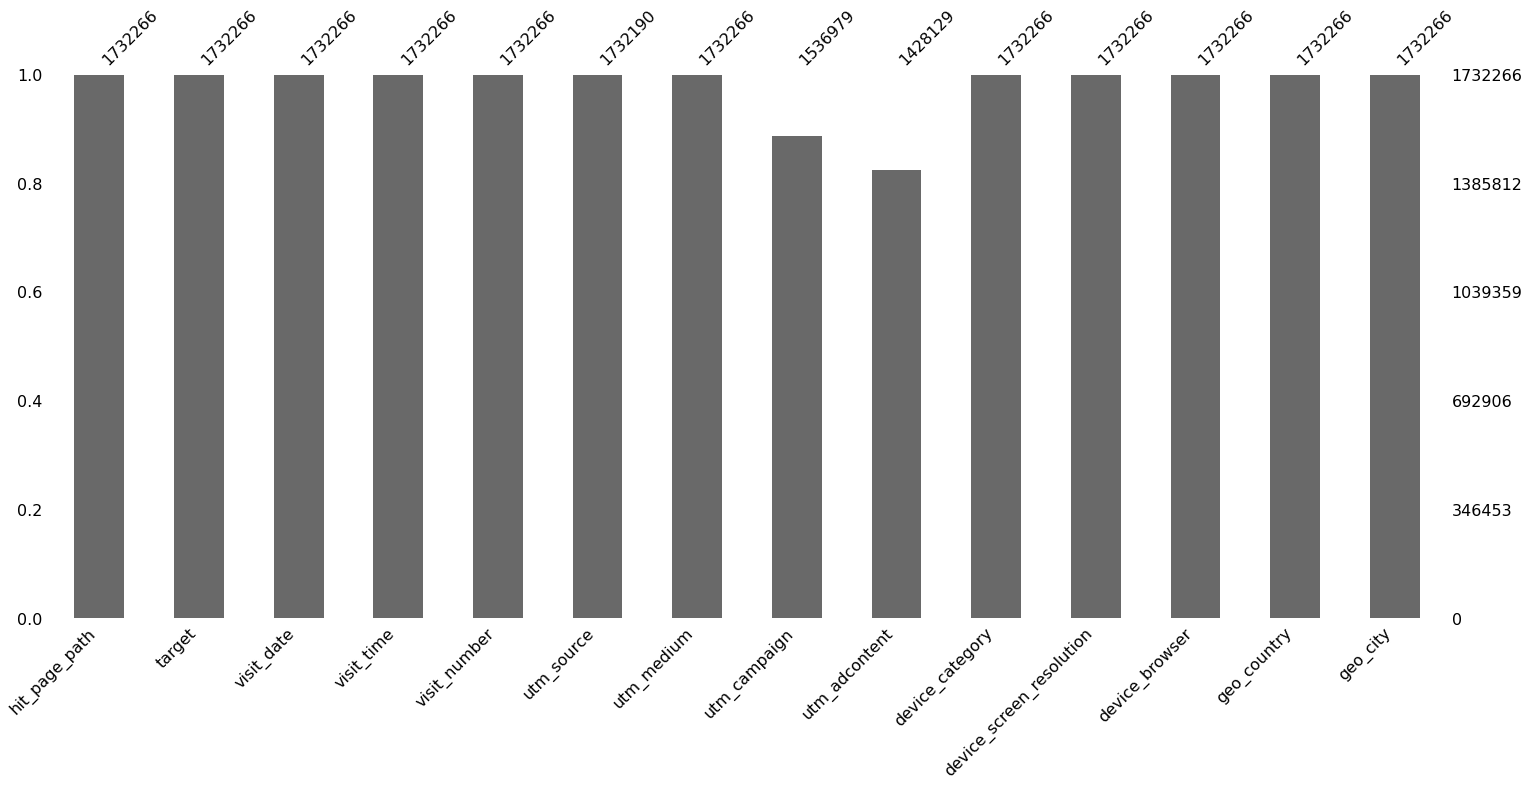

In [22]:
# диаграмма заполненности
msno.bar(df_united_clean)

<AxesSubplot:>

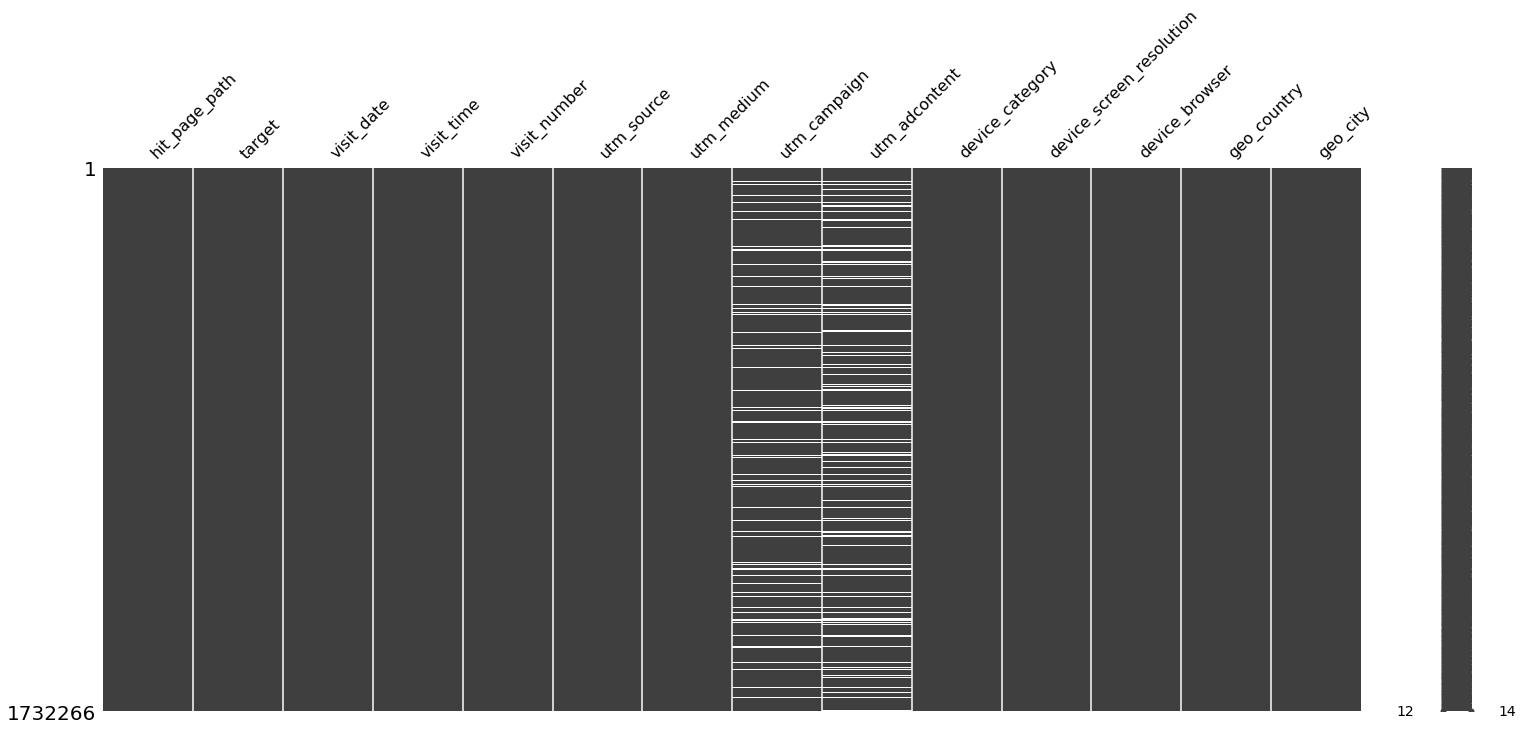

In [23]:
# матрица заполненности
msno.matrix(df_united_clean)

### Заполнение пропусков

In [54]:
df_united_clean.utm_adcontent.describe()

count                  1428129
unique                     280
top       JNHcPlZPxEMWDnRiyoBf
freq                    935408
Name: utm_adcontent, dtype: object

заполним медианой

In [55]:
adcontent_mode = str(df_united_clean.utm_adcontent.mode())
df_united_clean.utm_adcontent = df_united_clean.utm_adcontent.fillna(adcontent_mode)

In [56]:
df_united_clean.utm_campaign.describe()

count                  1536979
unique                     406
top       LTuZkdKfxRGVceoWkVyg
freq                    422992
Name: utm_campaign, dtype: object

заполним как 'other'

In [57]:
df_united_clean.utm_campaign = df_united_clean.utm_campaign.fillna('other')

In [58]:
df_united_clean.utm_source.isna().sum()

76

Удалим строки с 'nan'

In [59]:
df_united_clean = df_united_clean[df_united_clean.utm_source.notna()]

In [60]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 1732190
Persentage of filled rows 100.0


Преобразование содержимого столбцов

In [75]:
df_united_clean.hit_page_path.values[10]
df_united_clean[df_united_clean.hit_page_path.str.contains('/cars/all/', regex=False)]
df_united_clean.hit_page_path.str.contains('/cars/all/', regex=False).value_counts()

False    1511479
True      220711
Name: hit_page_path, dtype: int64

In [110]:
df_united_clean['car_brand'] = df_united_clean.hit_page_path.apply(lambda x: x.split('/')[3] if '/cars/all/' in x else 'empty')
df_united_clean['car_model'] = df_united_clean.hit_page_path.apply(lambda x: x.split('/')[4] if '/cars/all/' in x else 'empty')
df_united_clean = df_united_clean.drop(columns=['hit_page_path'])

In [128]:
df_united_clean['visit_datetime'] = pd.to_datetime(df_united_clean.visit_date + ' ' + df_united_clean.visit_time)
df_united_clean = df_united_clean.drop(columns=['visit_date', 'visit_time'])

In [136]:
df_united_clean['device_screen_length'] = df_united_clean.device_screen_resolution.apply(lambda x: int(x.split('x')[0]))
df_united_clean['device_screen_width'] = df_united_clean.device_screen_resolution.apply(lambda x: int(x.split('x')[1]))
df_united_clean = df_united_clean.drop(columns=['device_screen_resolution'])

In [144]:
df_united_clean = df_united_clean.rename(columns={'geo_country': 'country_name', 'geo_city': 'city_name'})

In [147]:
df_united_clean['target'] = df_united_clean.target.apply(lambda x: 1 if x > 0 else 0)

In [150]:
df_united_clean.device_category = df_united_clean.device_category.astype('category')

### Определение типов переменных в датасете df_united

|  Переменная               | Дискретная | Непрерывная | Качественная |
|---------------------------|------------|-------------|--------------|
| visit_datetime            | X          |             |              |
| visit_number              | X          |             |              |
| utm_source                |            |             | X            |
| utm_medium                |            |             | X            |
| utm_campaign              |            |             | X            |
| utm_adcontent             |            |             | X            |
| device_category           |            |             | X            |
| device_screen_length      | X          |             |              |
| device_screen_width       | X          |             |              |
| device_browser            |            |             | X            |
| country_name              |            |             | X            |
| city_name                 |            |             | X            |
| car_brand                 |            |             | X            |
| car_model                 |            |             | X            |
| target(целевая)           |            |             | X            |

In [151]:
df_united_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732190 entries, 0 to 1732265
Data columns (total 15 columns):
 #   Column                Dtype         
---  ------                -----         
 0   target                int64         
 1   visit_number          int64         
 2   utm_source            object        
 3   utm_medium            object        
 4   utm_campaign          object        
 5   utm_adcontent         object        
 6   device_category       category      
 7   device_browser        object        
 8   country_name          object        
 9   city_name             object        
 10  car_brand             object        
 11  car_model             object        
 12  visit_datetime        datetime64[ns]
 13  device_screen_length  int64         
 14  device_screen_width   int64         
dtypes: category(1), datetime64[ns](1), int64(4), object(9)
memory usage: 264.4+ MB


In [154]:
df_united_clean.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser', 'Edge',
       'Android Webview', 'Safari (in-app)', 'Firefox', 'Opera',
       'UC Browser', 'Opera Mini', 'Instagram 209.0.0.21.119 Android',
       'Mozilla Compatible Agent', 'Instagram 208.0.0.32.135 Android',
       'Instagram 202.0.0.23.119', '[FBAN', 'Android Runtime',
       'Instagram 213.0.0.29.120 Android', 'Puffin', 'Android',
       'com.vk.vkclient', 'Android Browser', 'Maxthon',
       'Internet Explorer', 'Instagram 207.0.0.28.118', 'MRCHROME',
       'helloworld', 'Instagram 199.1.0.34.119 Android',
       'Instagram 192.0.0.37.119', 'Amazon Silk', 'SeaMonkey',
       'Instagram 194.0.0.36.172 Android', 'Instagram 216.0.0.12.135',
       'Instagram 202.0.0.37.123 Android', 'MyApp', '(not set)',
       'Coc Coc', 'NetFront', 'Instagram 201.0.0.23.111',
       'Instagram 203.0.0.26.117', 'Mozilla',
       'Instagram 192.0.0.35.123 Android',
       'Instagram 212.0.0.38.119 Android', 'Instagram 208.0.0.26.131',
